
### Information:

Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv

- instant: record index
- dteday : date
- season : season (1:winter, 2:spring, 3:summer, 4:fall)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from [Web Link])
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit :
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

## Provided in the zip file


## Import modules

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = 1999

## Loading the dataset

In [4]:
df = pd.read_csv('hour.csv')
df.head()

instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1

In [92]:
# statistical info
df.describe()

instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165      2.005771      0.465431      0.639357      0.192556   
min        0.000000      0.000000      0.000000      1.000000      0.020000   
25%        0.000000      1.000000      0.000000      1.000000      0.340000   
50%        0.000000      3.000000      1.000000      1.000000      0.500000   
75%        0.000000      5.000000      1.000000      2.000000      0.660000   
max        1.000000      6.000000      1.000000      4.000000      1.000000   

              atemp           hum     windspeed        casual    registered  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.475775      0.627229      0.190098     35.676218    153.786869   
std        0.171850      0.192930      0.122340     49.305030    151.357286   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.333300      0.480000      0.104500      4.000000     34.000000   
50%        0.484800      0.630000      0.194000     17.000000    115.000000   
75%        0.621200      0.780000      0.253700     48.000000    220.000000   
max        1.000000      1.000000      0.850700    367.000000    886.000000   

                cnt  
count  17379.000000  
mean     189.463088  
std      181.387599  
min        1.000000  
25%       40.000000  
50%      142.000000  
75%      281.000000  
max      977.000000

In [93]:
# datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [94]:
# unique values
df.apply(lambda x: len(x.unique()))

instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64

## Preprocessing the dataset

In [95]:
df = df.rename(columns={'weathersit':'weather',
                       'yr':'year',
                       'mnth':'month',
                       'hr':'hour',
                       'hum':'humidity',
                       'cnt':'count'})
df.head()

instant      dteday  season  year  month  hour  holiday  weekday  \
0        1  2011-01-01       1     0      1     0        0        6   
1        2  2011-01-01       1     0      1     1        0        6   
2        3  2011-01-01       1     0      1     2        0        6   
3        4  2011-01-01       1     0      1     3        0        6   
4        5  2011-01-01       1     0      1     4        0        6   

   workingday  weather  temp   atemp  humidity  windspeed  casual  registered  \
0           0        1  0.24  0.2879      0.81        0.0       3          13   
1           0        1  0.22  0.2727      0.80        0.0       8          32   
2           0        1  0.22  0.2727      0.80        0.0       5          27   
3           0        1  0.24  0.2879      0.75        0.0       3          10   
4           0        1  0.24  0.2879      0.75        0.0       0           1   

   count  
0     16  
1     40  
2     32  
3     13  
4      1

In [96]:
df = df.drop(columns=['instant', 'dteday', 'year'])
df.head()

season  month  hour  holiday  weekday  workingday  weather  temp   atemp  \
0       1      1     0        0        6           0        1  0.24  0.2879   
1       1      1     1        0        6           0        1  0.22  0.2727   
2       1      1     2        0        6           0        1  0.22  0.2727   
3       1      1     3        0        6           0        1  0.24  0.2879   
4       1      1     4        0        6           0        1  0.24  0.2879   

   humidity  windspeed  casual  registered  count  
0      0.81        0.0       3          13     16  
1      0.80        0.0       8          32     40  
2      0.80        0.0       5          27     32  
3      0.75        0.0       3          10     13  
4      0.75        0.0       0           1      1

In [97]:
# change int columns to category
cols = ['season','month','holiday','weekday','workingday','weather']

for col in cols:
    df[col] = df[col].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      17379 non-null  category
 1   month       17379 non-null  category
 2   hour        17379 non-null  int64   
 3   holiday     17379 non-null  category
 4   weekday     17379 non-null  category
 5   workingday  17379 non-null  category
 6   weather     17379 non-null  category
 7   temp        17379 non-null  float64 
 8   atemp       17379 non-null  float64 
 9   humidity    17379 non-null  float64 
 10  windspeed   17379 non-null  float64 
 11  casual      17379 non-null  int64   
 12  registered  17379 non-null  int64   
 13  count       17379 non-null  int64   
dtypes: category(6), float64(4), int64(4)
memory usage: 1.2 MB


## Exploratory Data Analysis

[Text(0.5, 1.0, 'Count of bikes during weekdays and weekends')]

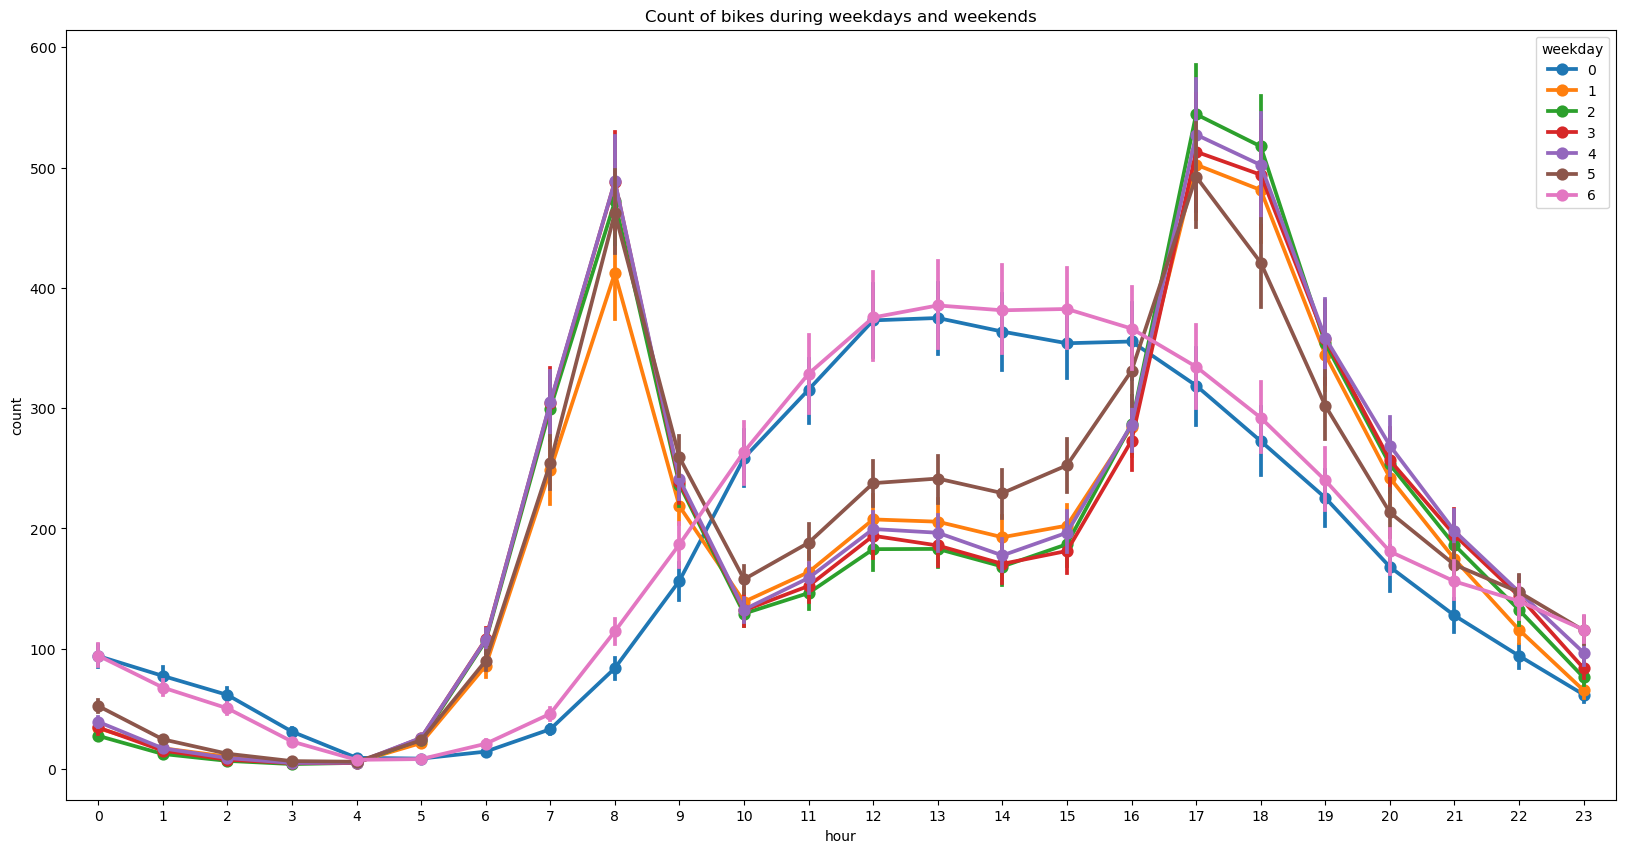

In [98]:
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=df, x='hour', y='count', hue='weekday', ax=ax)
ax.set(title='Count of bikes during weekdays and weekends')

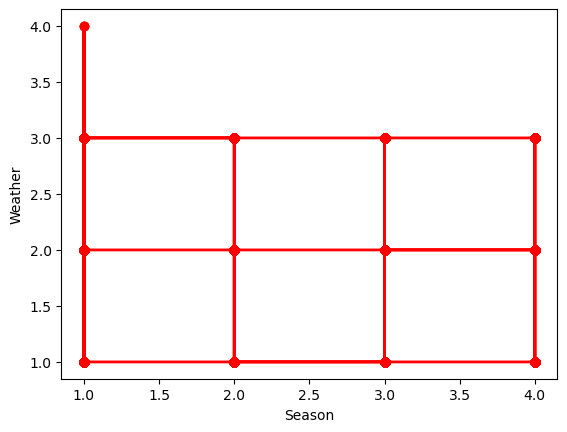

In [5]:
plt.plot(df['season'],df['weathersit'],'ro',linestyle='-',linewidth=2)
plt.xlabel('Season')
plt.ylabel('Weather')
plt.show()

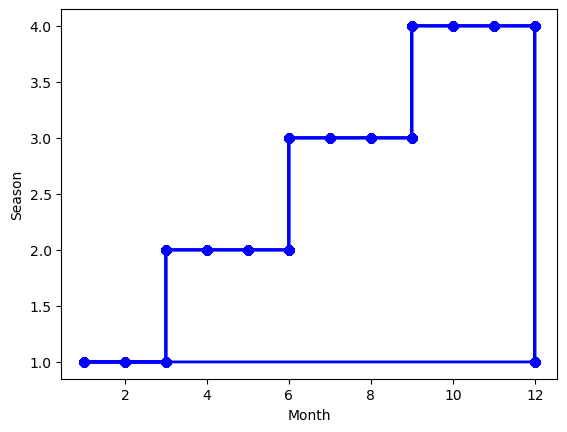

In [6]:
plt.plot(df['mnth'],df['season'],'bo',linestyle='-',linewidth=2)
plt.xlabel('Month')
plt.ylabel('Season')
plt.show()

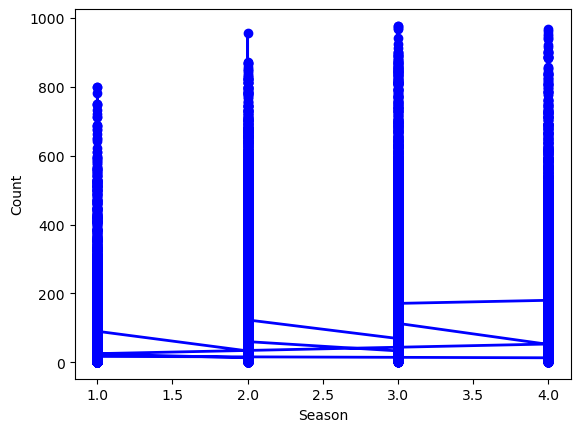

In [7]:
plt.plot(df['season'],df['cnt'],'bo',linestyle='-',linewidth=2)
plt.xlabel('Season')
plt.ylabel('Count')
plt.show()

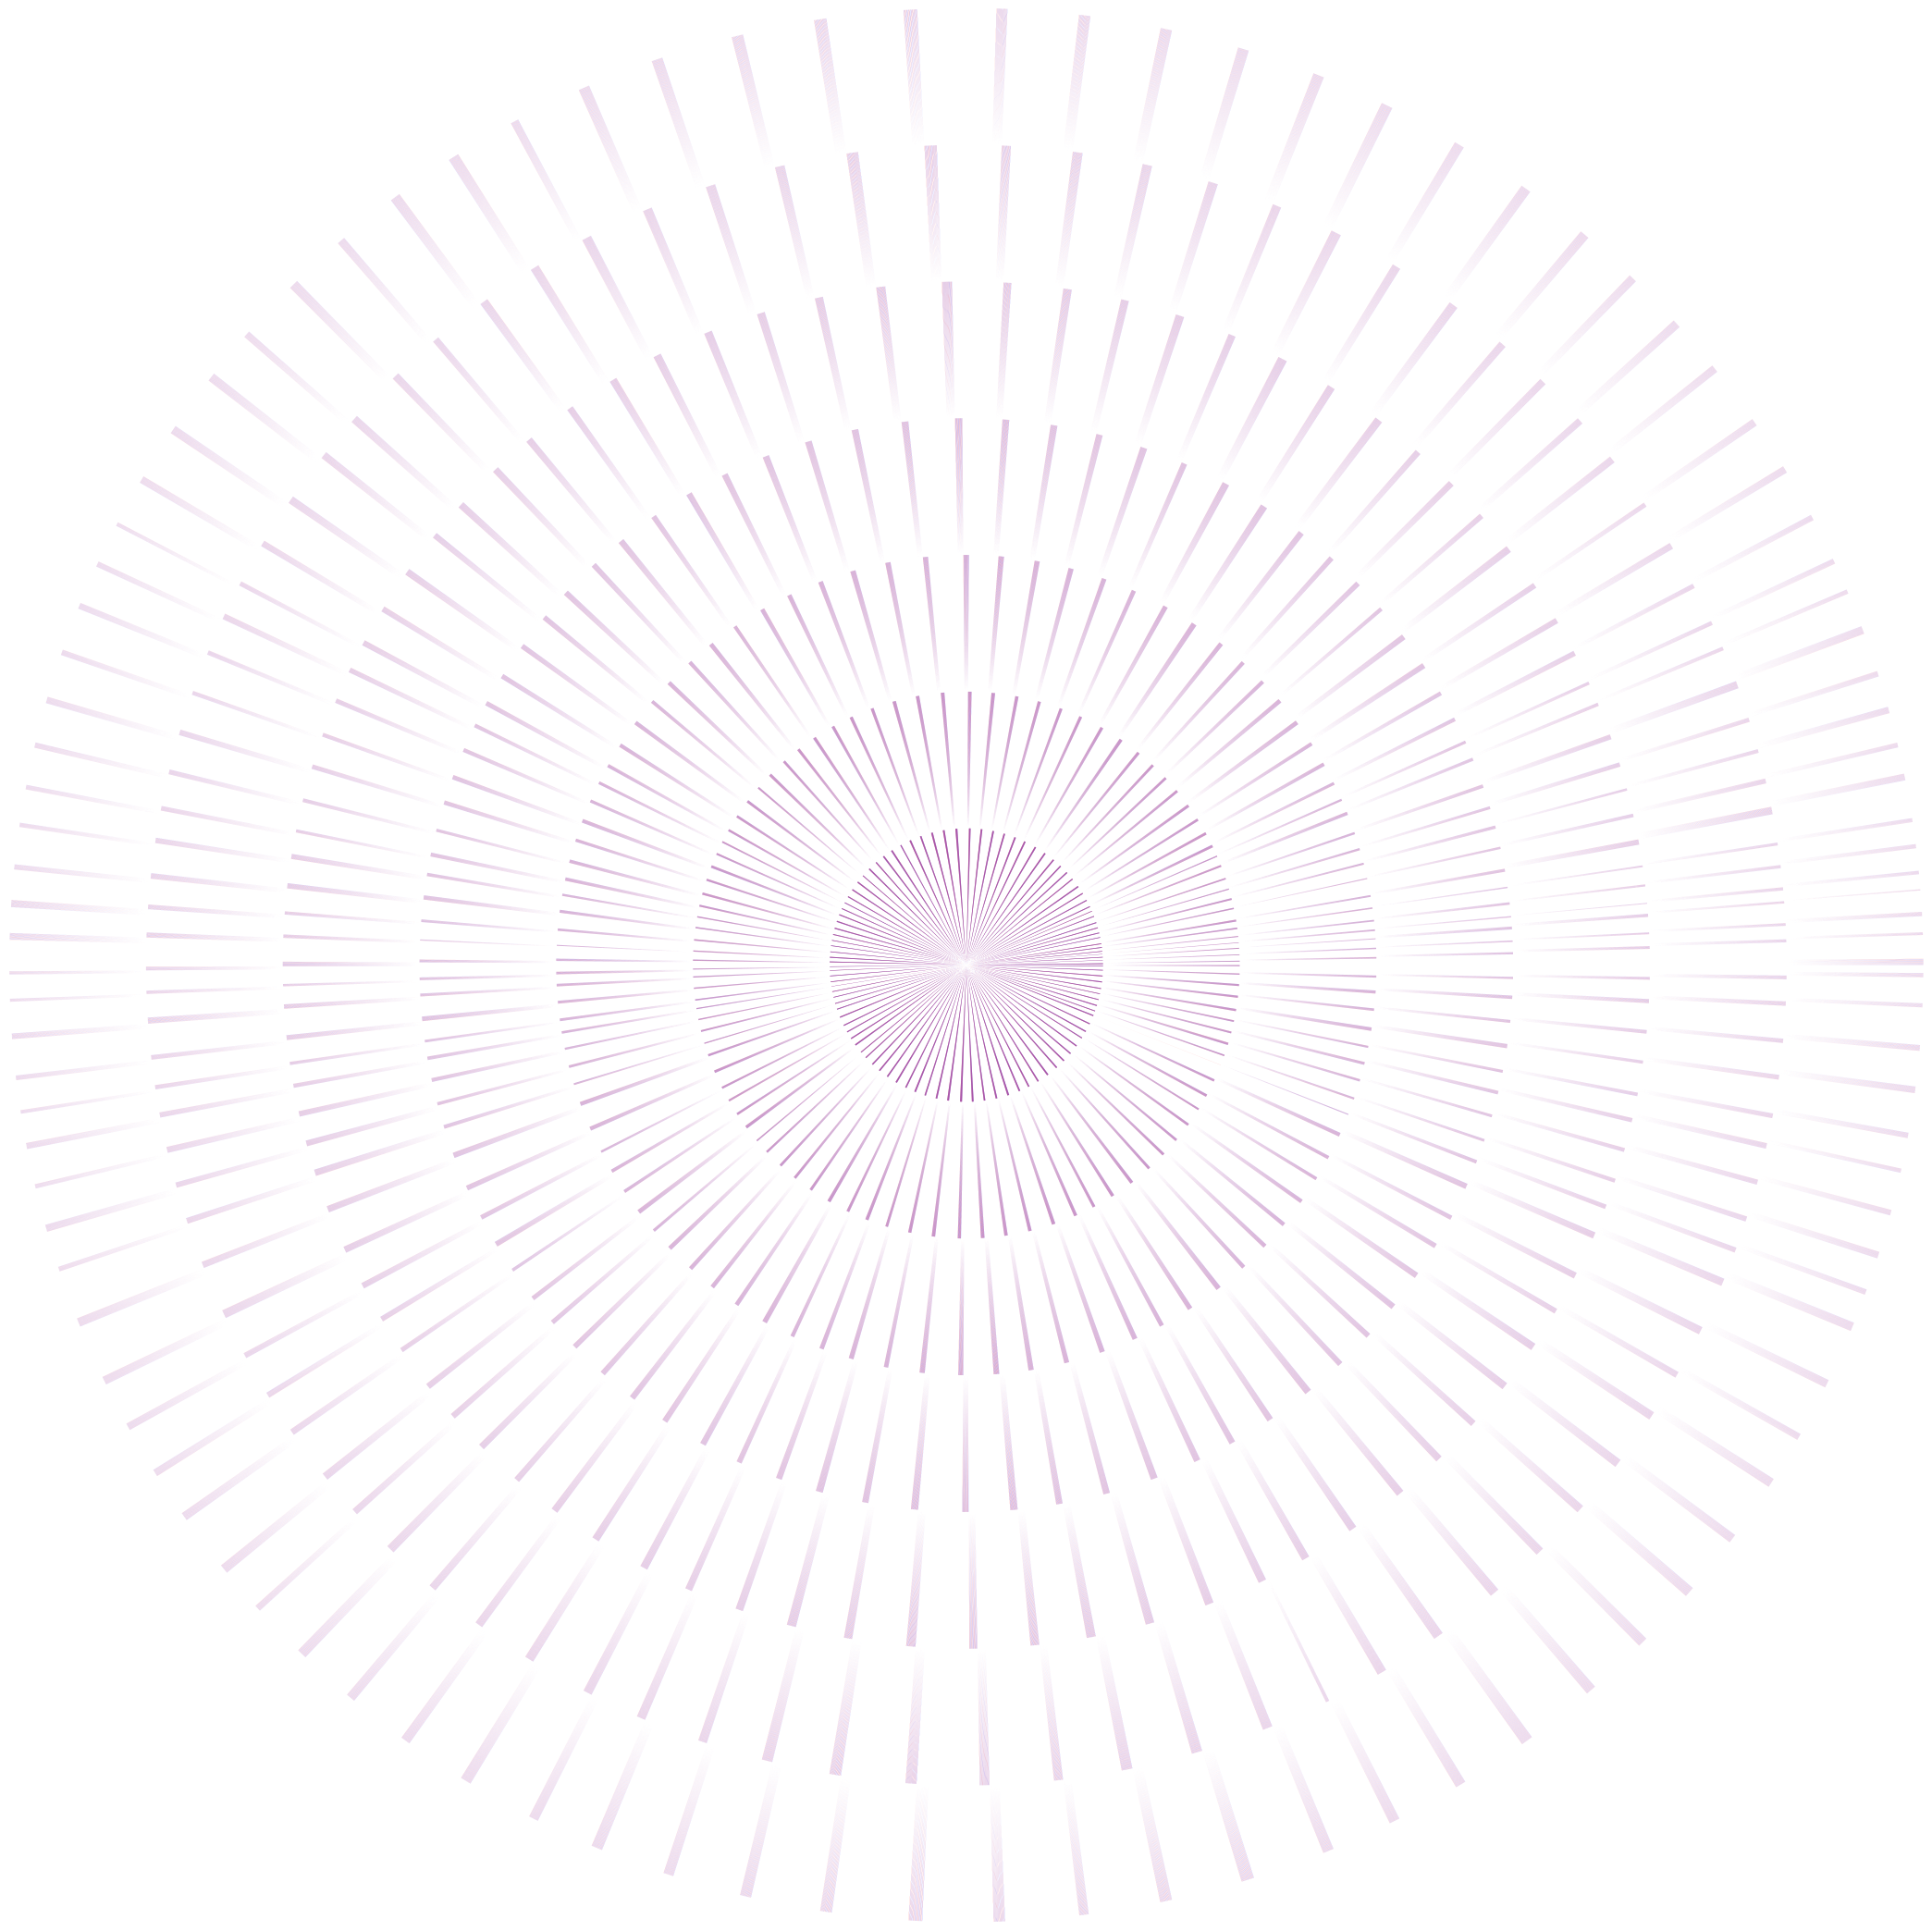

In [8]:
color=['blue','red']
plt.pie(df['atemp'],df['weekday'],colors=color,radius=1)
plt.show()

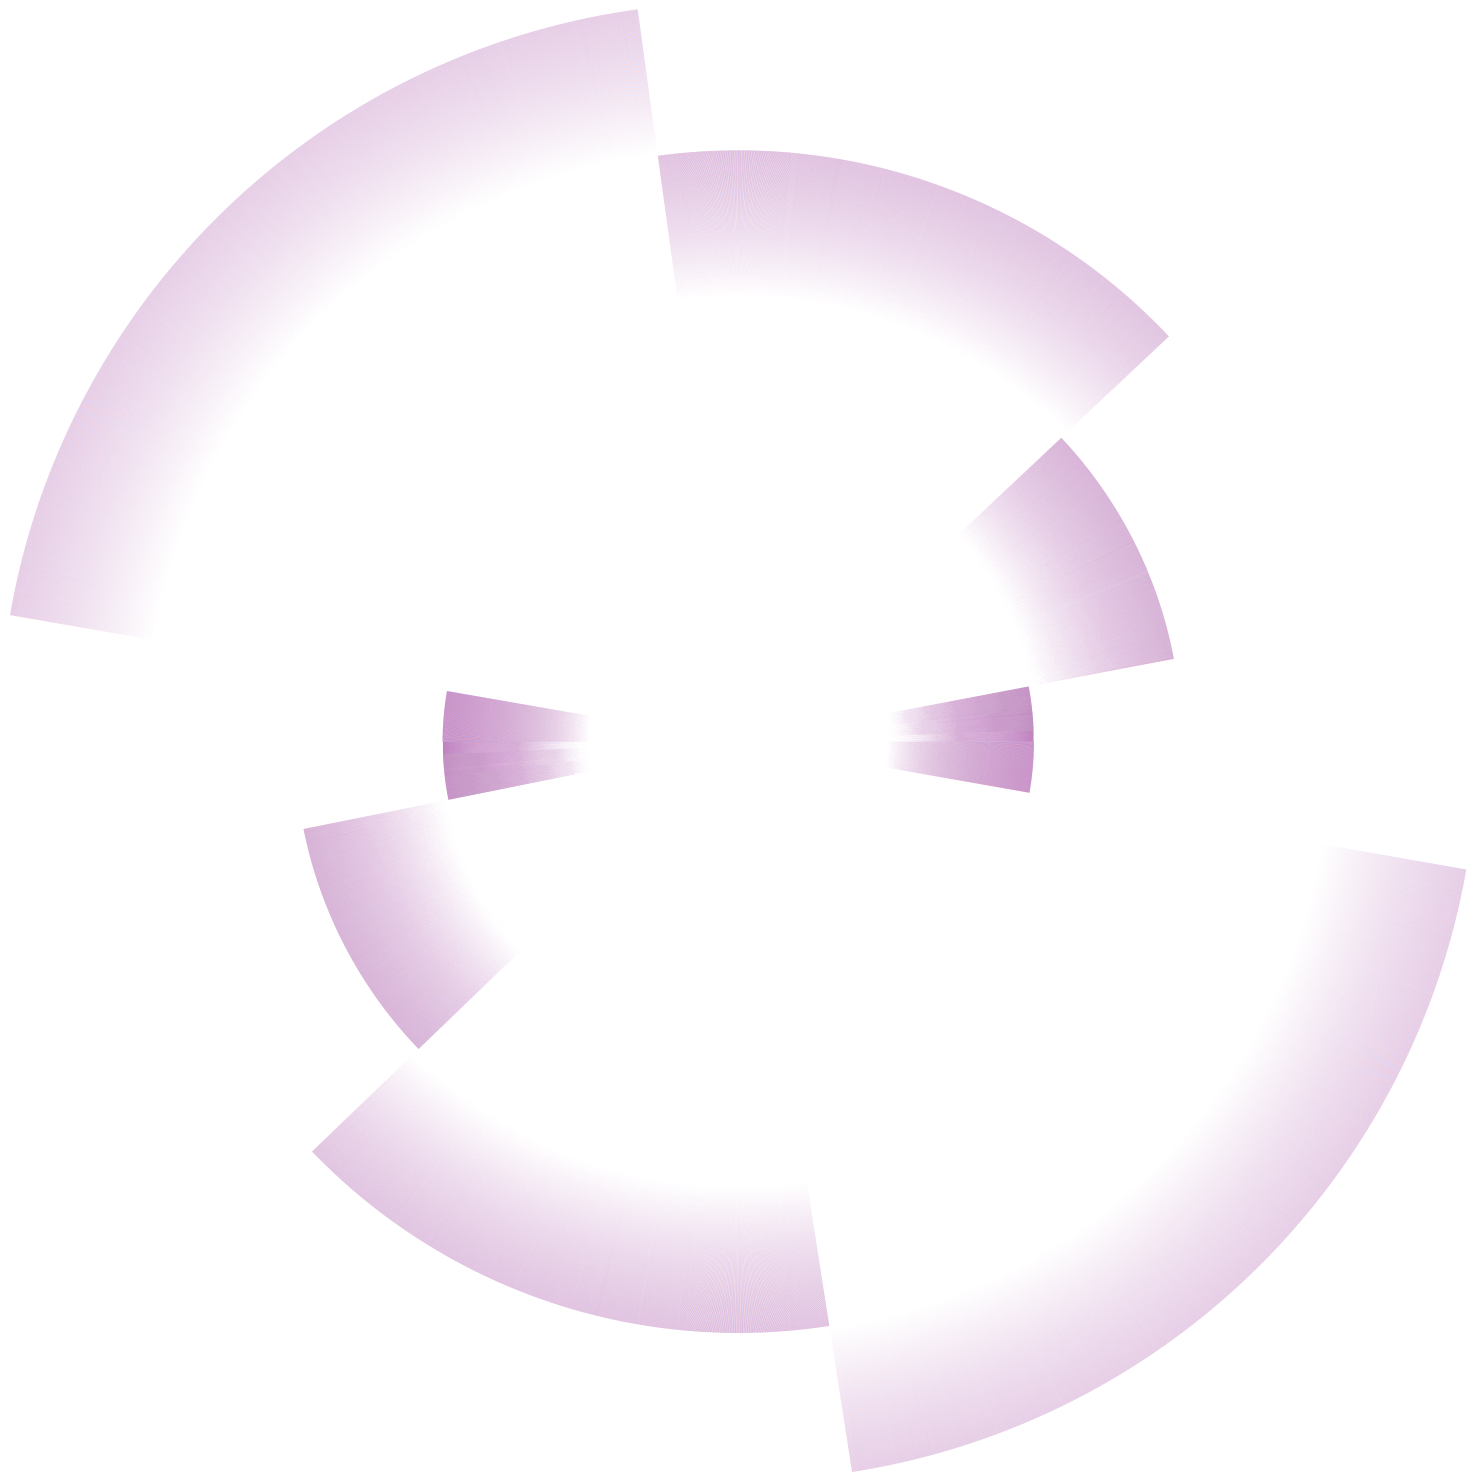

In [9]:
color=['blue','red']
plt.pie(df['mnth'],df['season'],colors=color,radius=1)
plt.show()

[Text(0.5, 1.0, 'Count of bikes during weekdays and weekends: Unregistered users')]

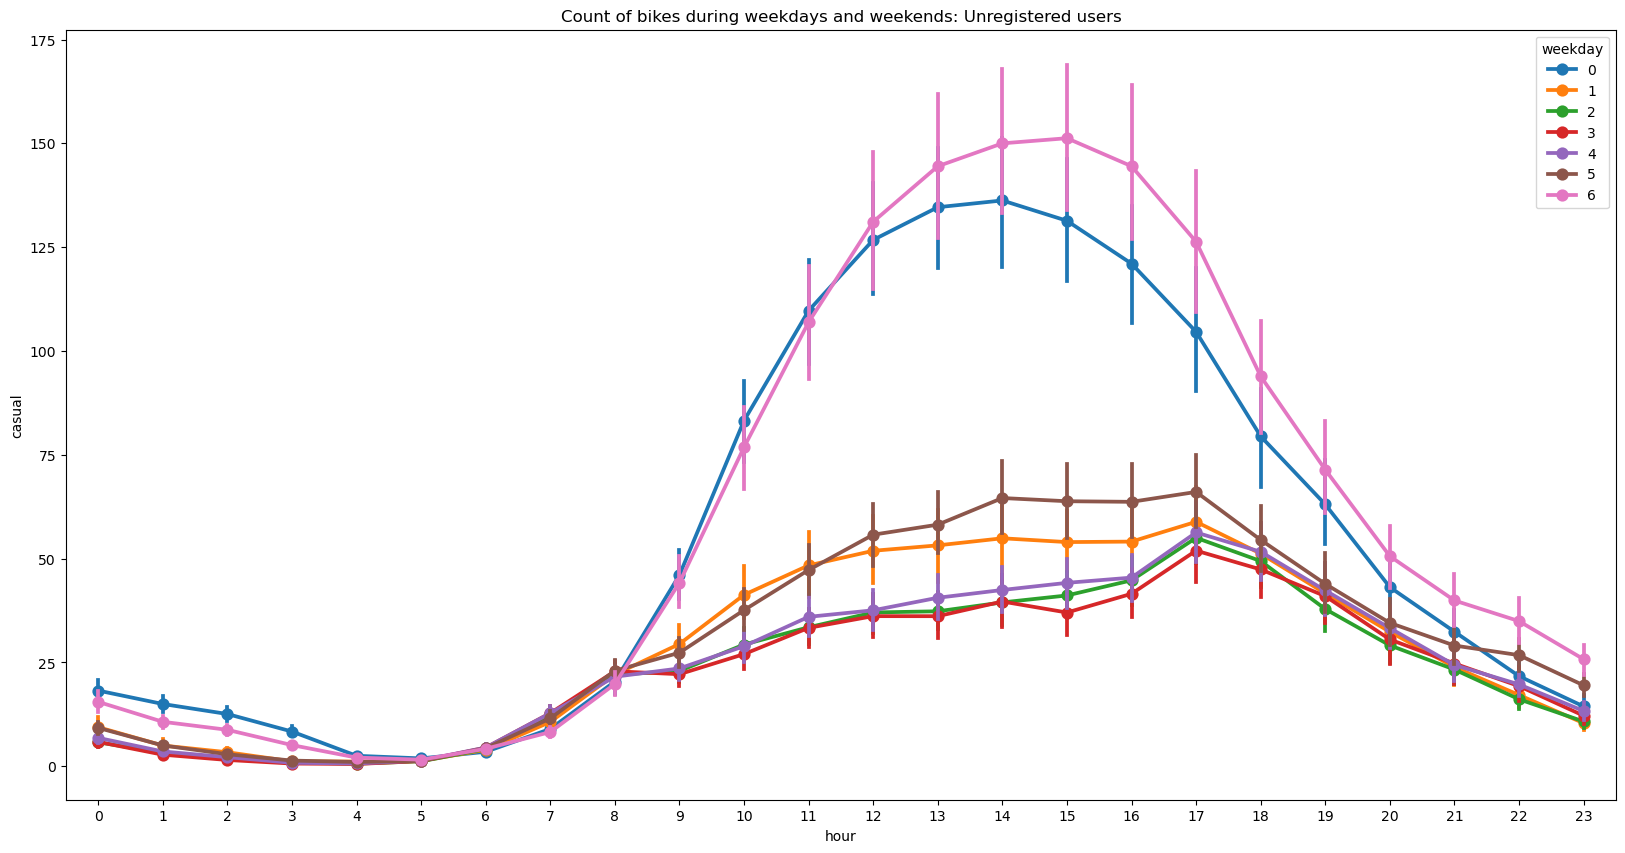

In [99]:
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=df, x='hour', y='casual', hue='weekday', ax=ax)
ax.set(title='Count of bikes during weekdays and weekends: Unregistered users')

[Text(0.5, 1.0, 'Count of bikes during weekdays and weekends: Registered users')]

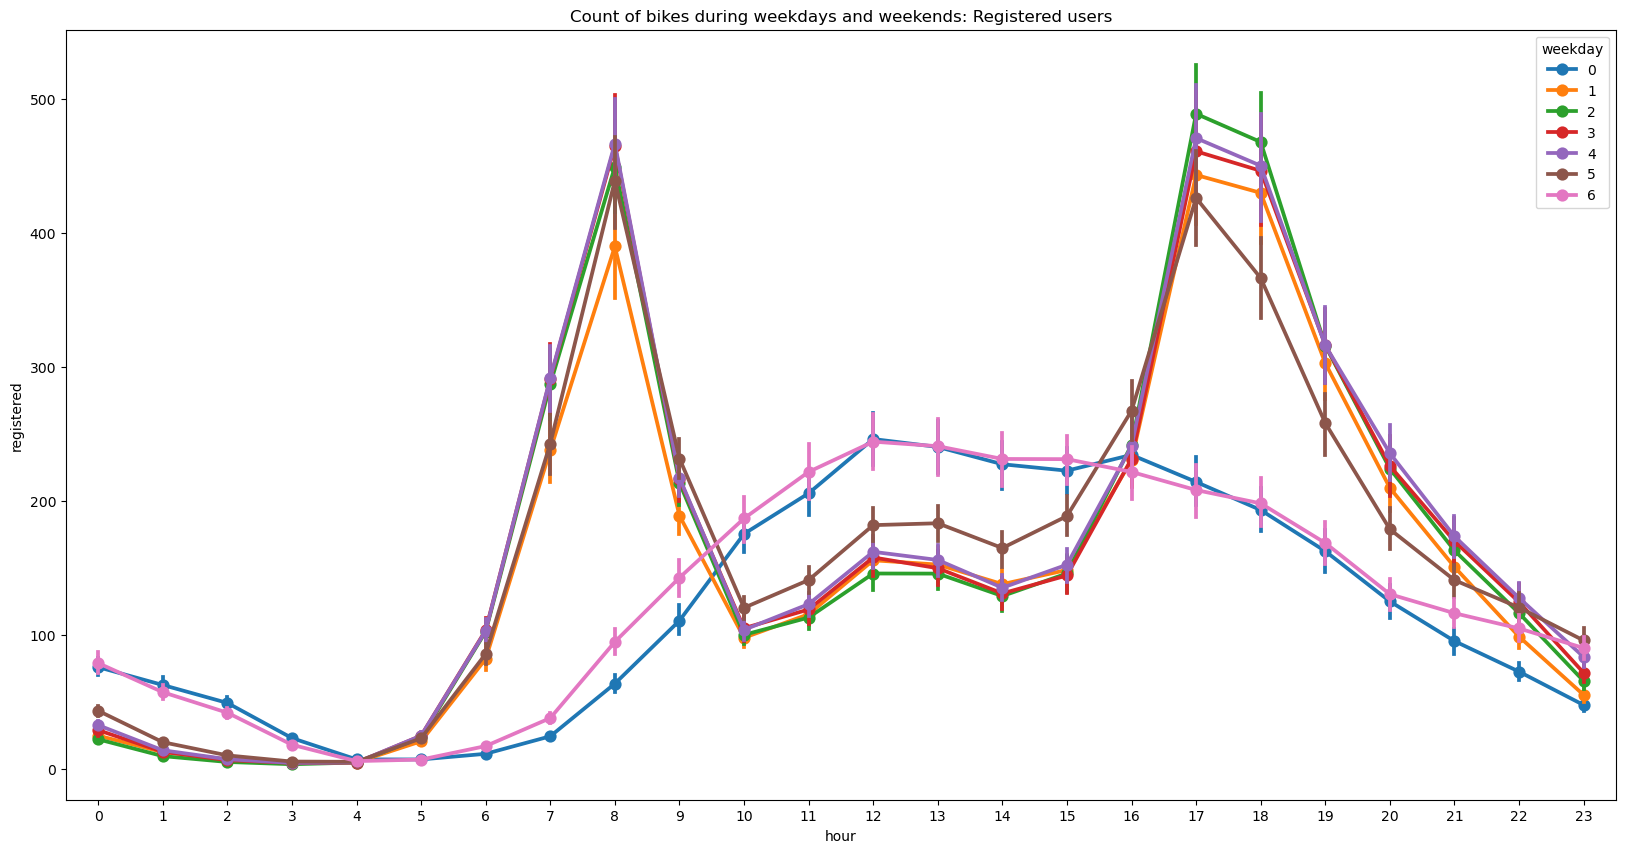

In [100]:
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=df, x='hour', y='registered', hue='weekday', ax=ax)
ax.set(title='Count of bikes during weekdays and weekends: Registered users')

[Text(0.5, 1.0, 'Count of bikes during different weathers')]

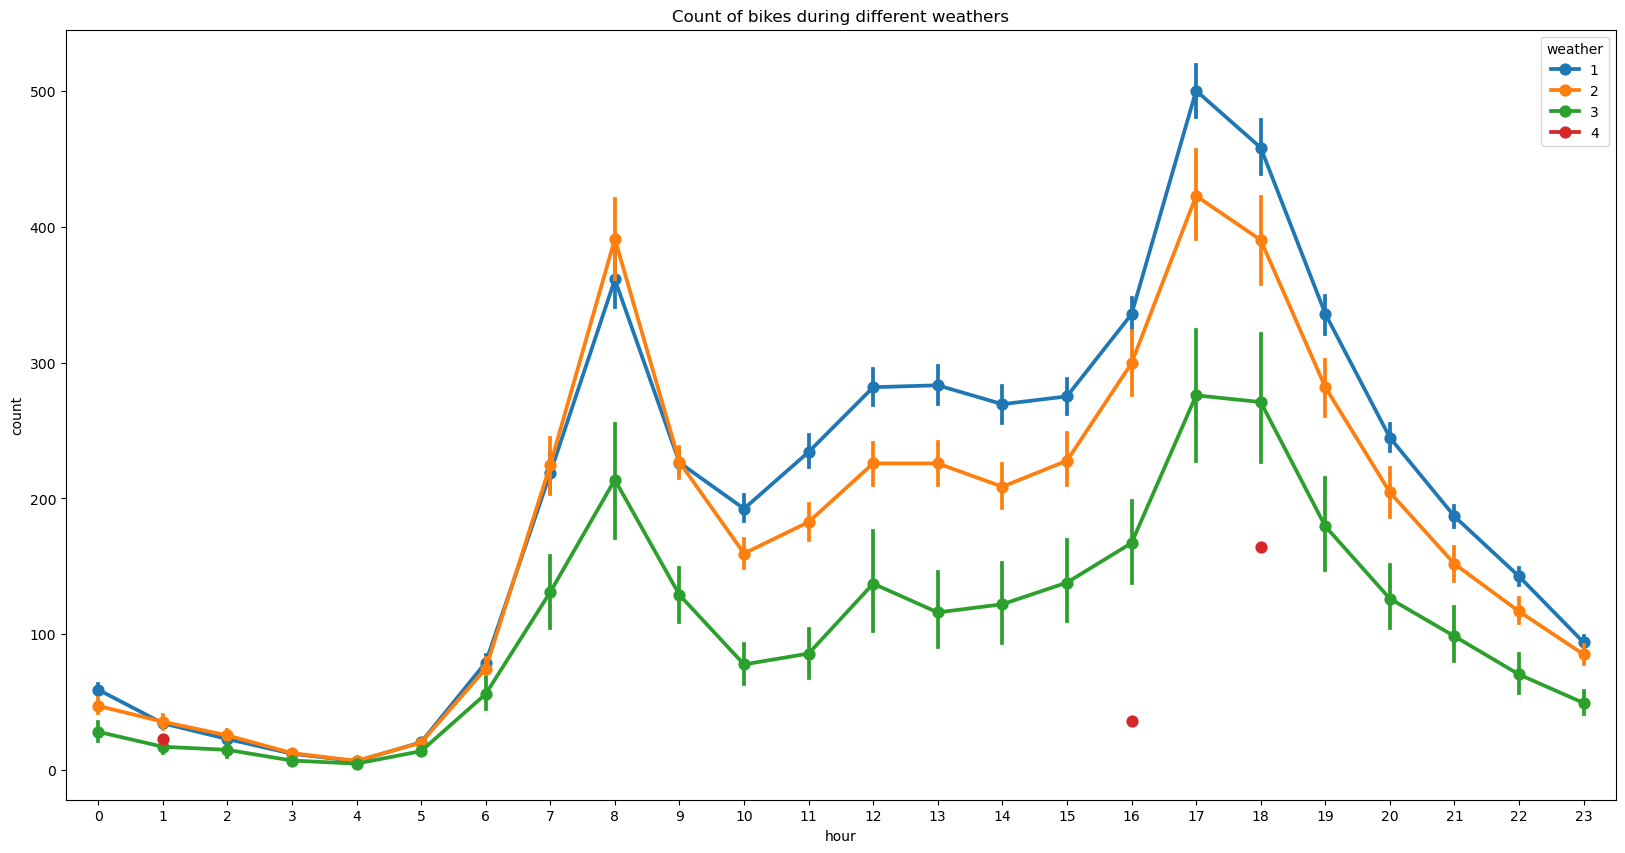

In [101]:
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=df, x='hour', y='count', hue='weather', ax=ax)
ax.set(title='Count of bikes during different weathers')

[Text(0.5, 1.0, 'Count of bikes during different seasons')]

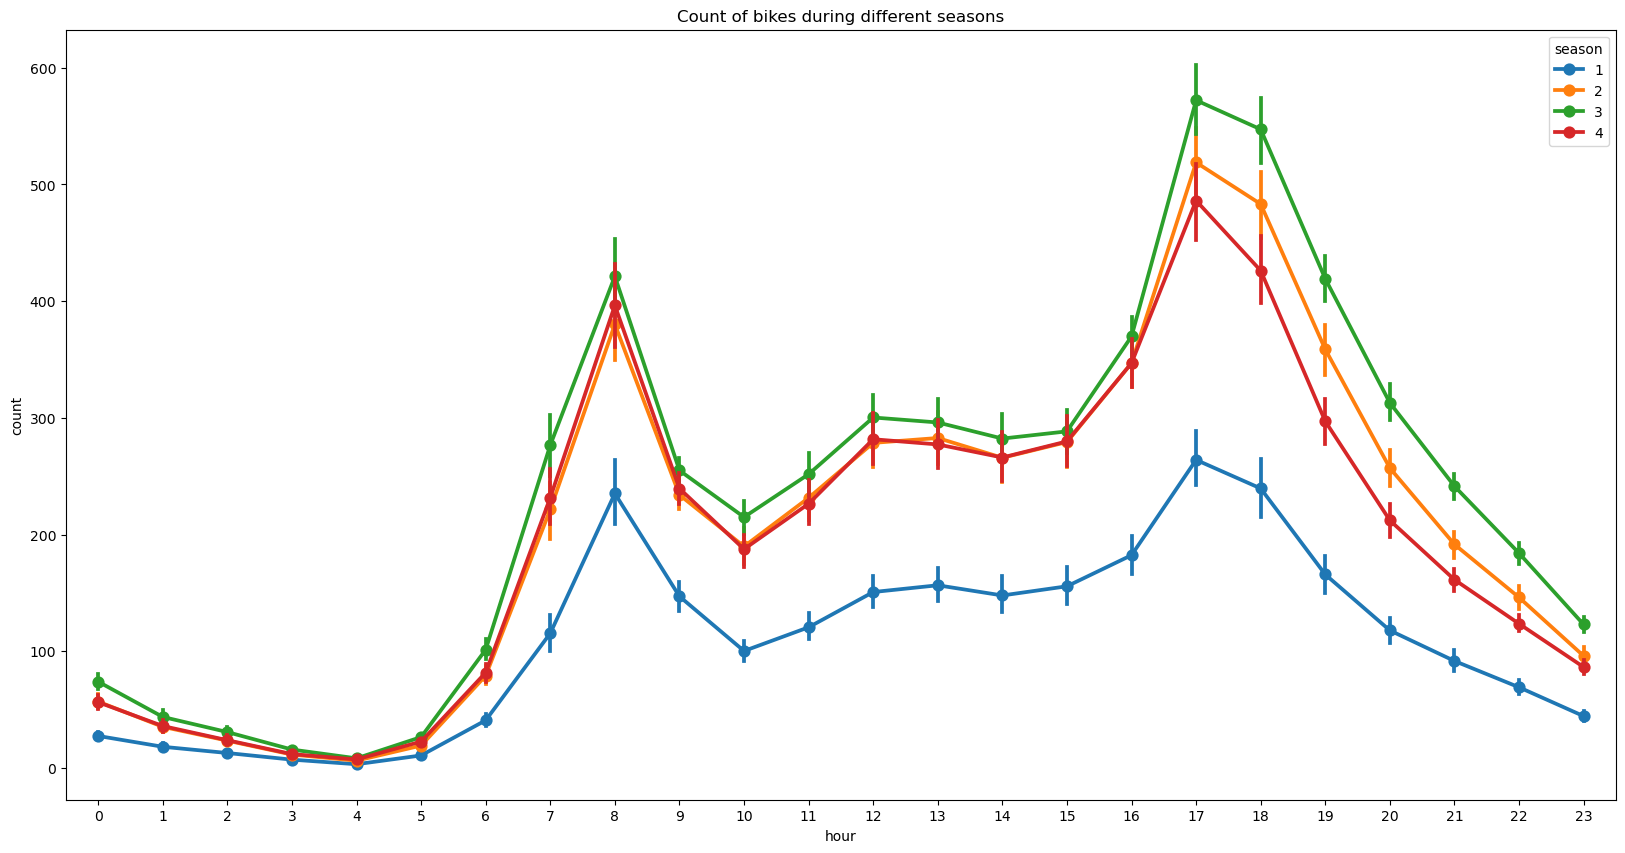

In [102]:
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=df, x='hour', y='count', hue='season', ax=ax)
ax.set(title='Count of bikes during different seasons')

[Text(0.5, 1.0, 'Count of bikes during different months')]

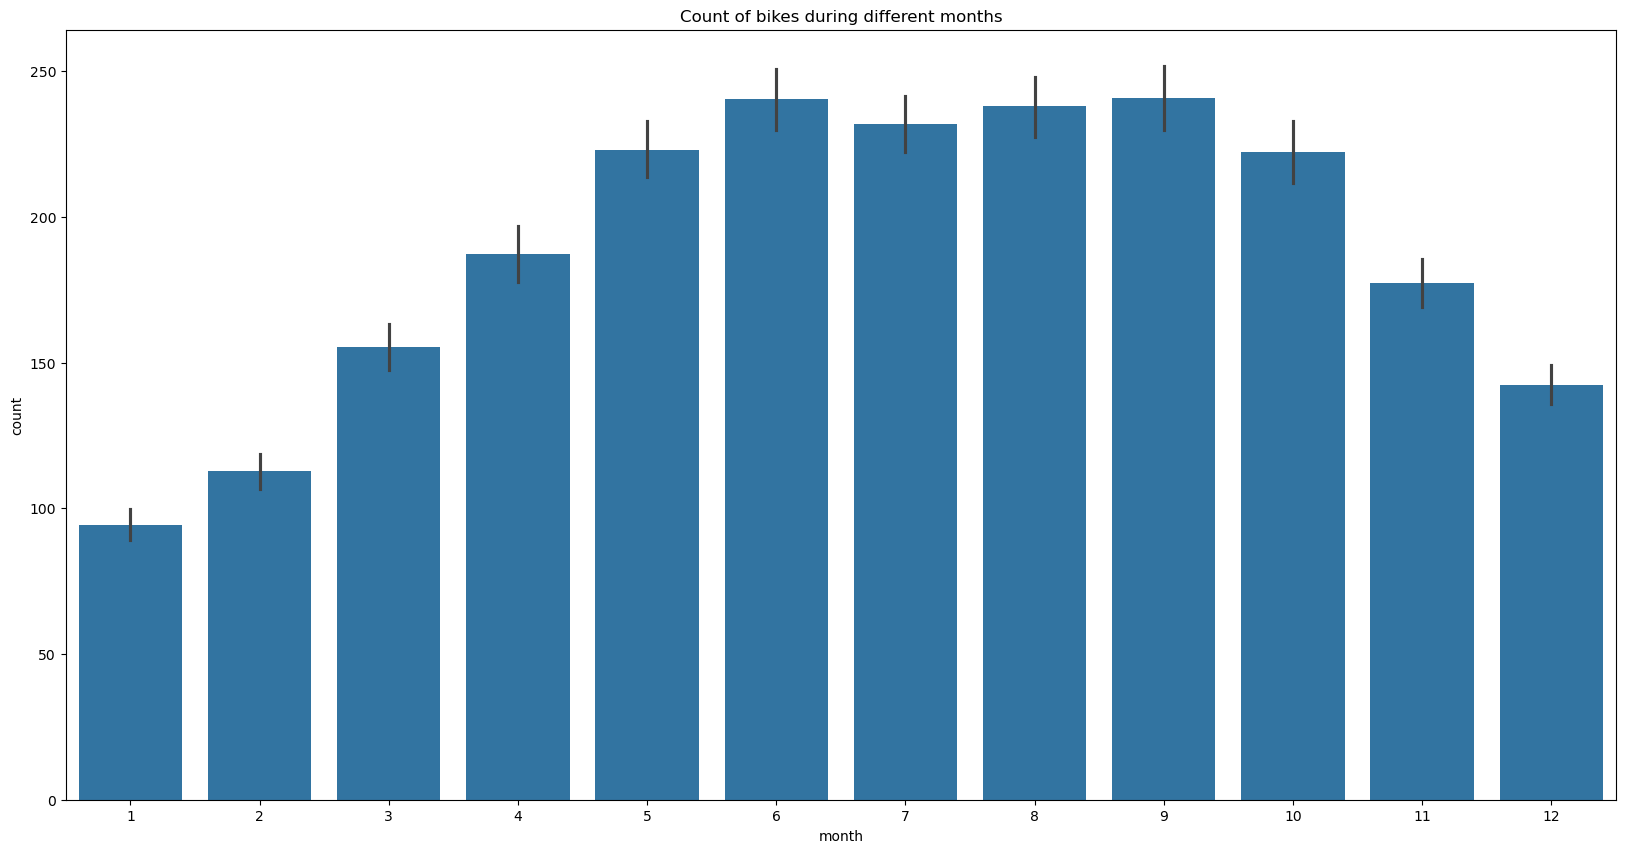

In [103]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(data=df, x='month', y='count', ax=ax)
ax.set(title='Count of bikes during different months')

[Text(0.5, 1.0, 'Count of bikes during different days')]

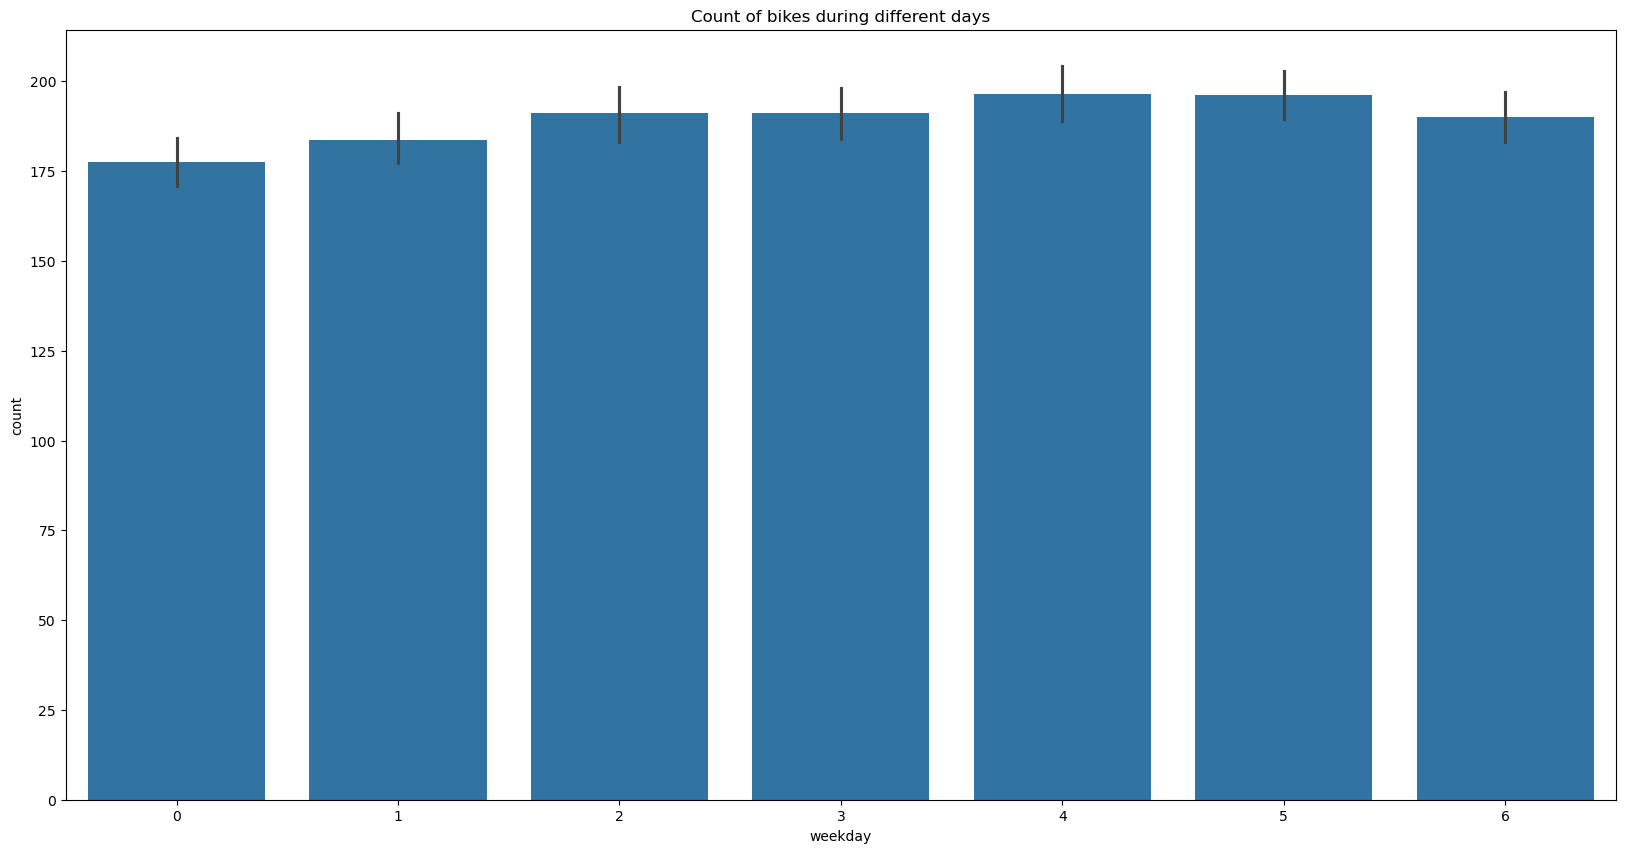

In [104]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(data=df, x='weekday', y='count', ax=ax)
ax.set(title='Count of bikes during different days')

[Text(0.5, 1.0, 'Relation between humidity and users')]

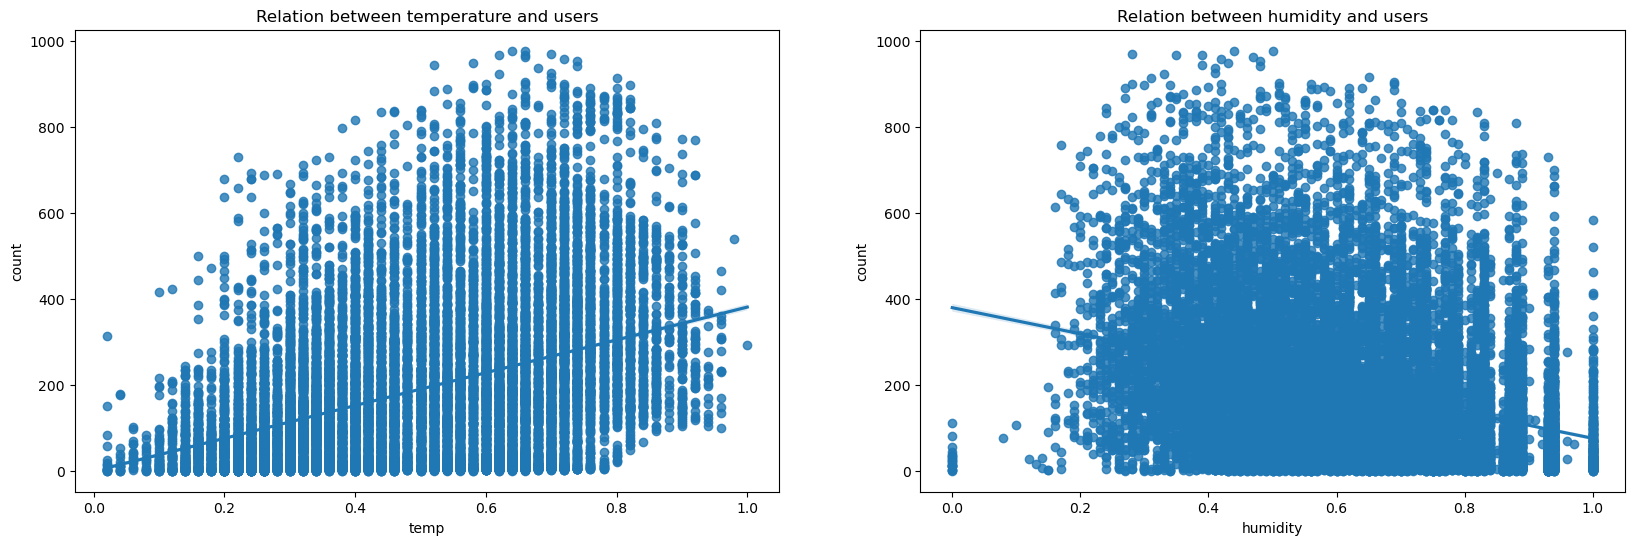

In [105]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(20,6))
sns.regplot(x=df['temp'], y=df['count'], ax=ax1)
ax1.set(title="Relation between temperature and users")
sns.regplot(x=df['humidity'], y=df['count'], ax=ax2)
ax2.set(title="Relation between humidity and users")

[Text(0.5, 1.0, 'Theoritical quantiles')]

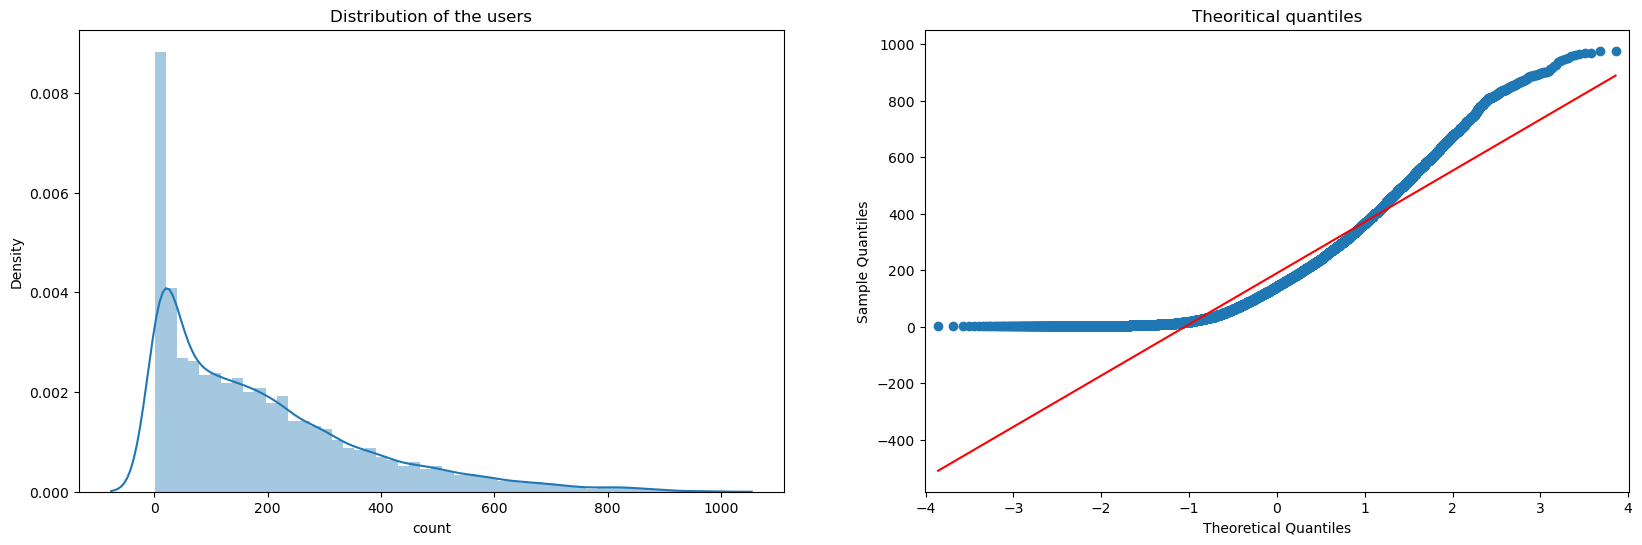

In [106]:
from statsmodels.graphics.gofplots import qqplot
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(20,6))
sns.distplot(df['count'], ax=ax1)
ax1.set(title='Distribution of the users')
qqplot(df['count'], ax=ax2, line='s')
ax2.set(title='Theoritical quantiles')

In [107]:
df['count'] = np.log(df['count'])

[Text(0.5, 1.0, 'Theoritical quantiles')]

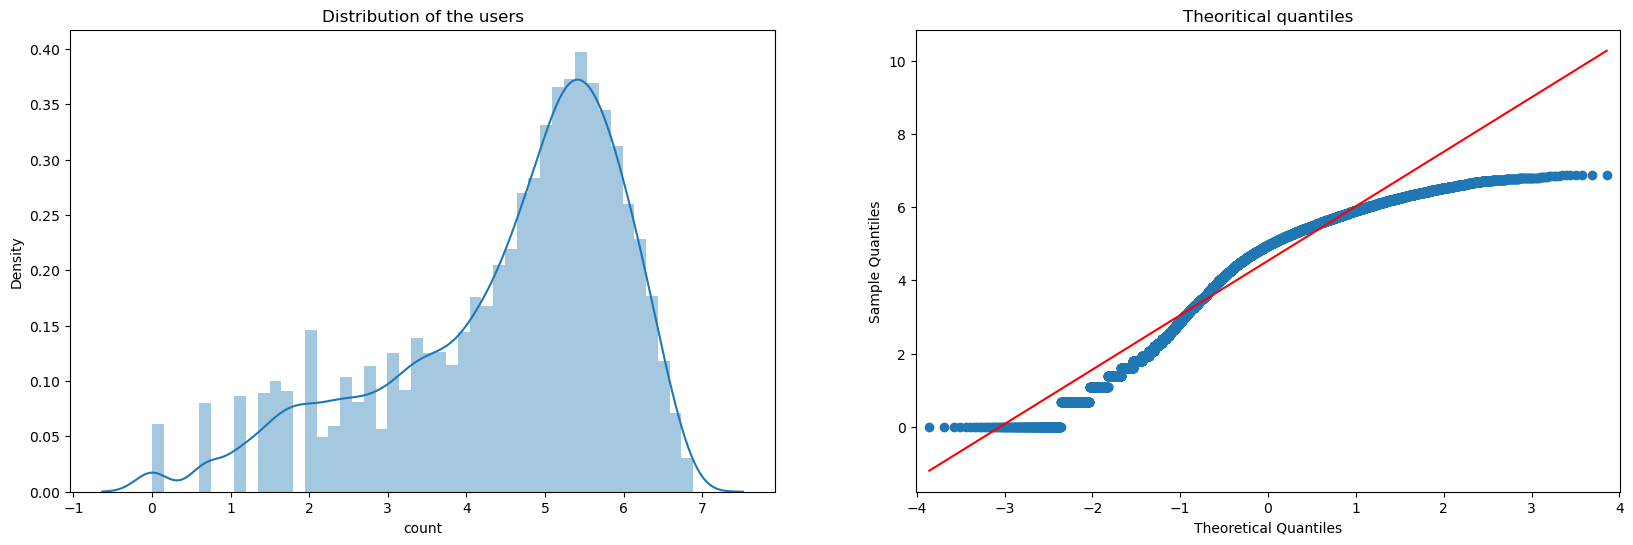

In [108]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(20,6))
sns.distplot(df['count'], ax=ax1)
ax1.set(title='Distribution of the users')
qqplot(df['count'], ax=ax2, line='s')
ax2.set(title='Theoritical quantiles')

## Coorelation Matrix / HeatMap



<Axes: >

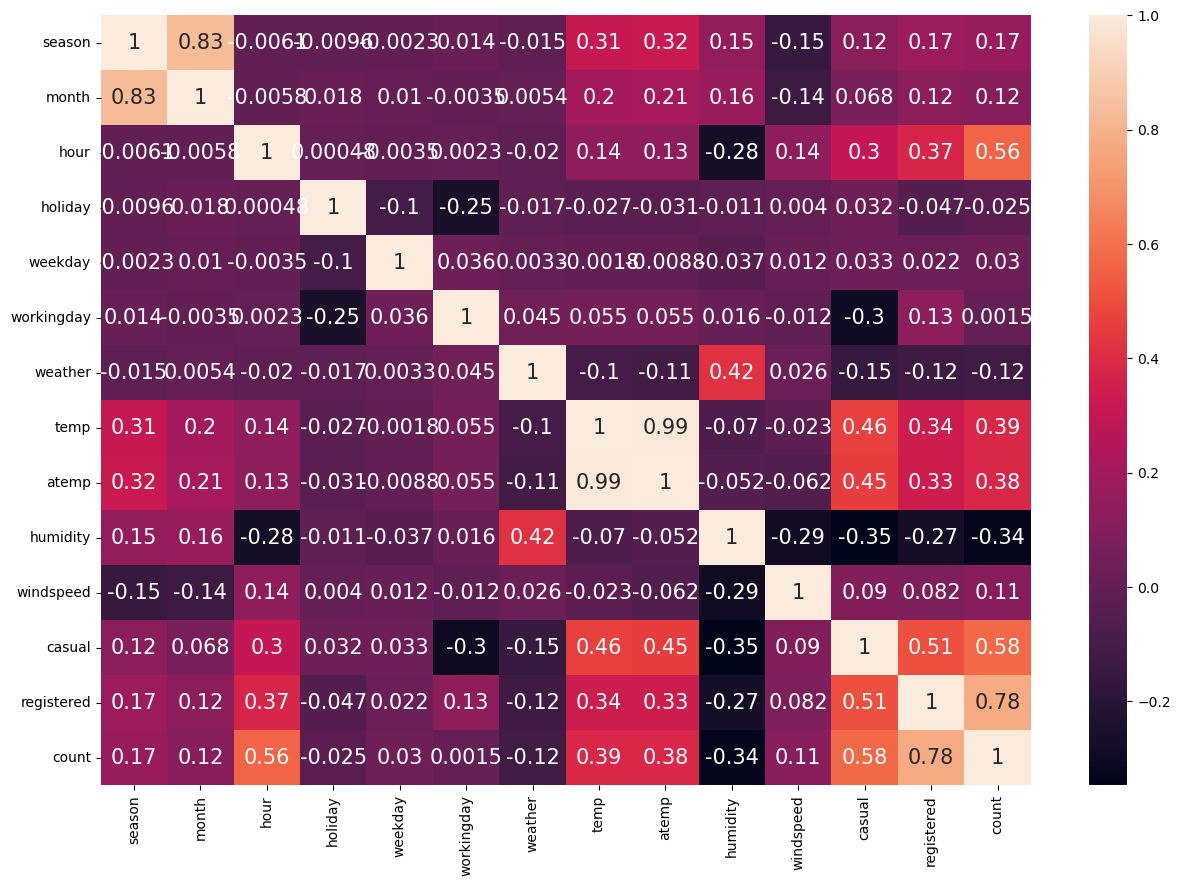

In [109]:
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, annot_kws={'size':15})

## One hot Encoding

In [110]:
pd.get_dummies(df['season'], prefix='season', drop_first=True)

season_2  season_3  season_4
0         False     False     False
1         False     False     False
2         False     False     False
3         False     False     False
4         False     False     False
...         ...       ...       ...
17374     False     False     False
17375     False     False     False
17376     False     False     False
17377     False     False     False
17378     False     False     False

[17379 rows x 3 columns]

In [111]:
df_oh = df

def one_hot_encoding(data, column):
    data = pd.concat([data, pd.get_dummies(data[column], prefix=column, drop_first=True)], axis=1)
    data = data.drop([column], axis=1)
    return data

cols = ['season','month','hour','holiday','weekday','workingday','weather']

for col in cols:
    df_oh = one_hot_encoding(df_oh, col)
df_oh.head()

temp   atemp  humidity  windspeed  casual  registered     count  season_2  \
0  0.24  0.2879      0.81        0.0       3          13  2.772589     False   
1  0.22  0.2727      0.80        0.0       8          32  3.688879     False   
2  0.22  0.2727      0.80        0.0       5          27  3.465736     False   
3  0.24  0.2879      0.75        0.0       3          10  2.564949     False   
4  0.24  0.2879      0.75        0.0       0           1  0.000000     False   

   season_3  season_4  month_2  month_3  month_4  month_5  month_6  month_7  \
0     False     False    False    False    False    False    False    False   
1     False     False    False    False    False    False    False    False   
2     False     False    False    False    False    False    False    False   
3     False     False    False    False    False    False    False    False   
4     False     False    False    False    False    False    False    False   

   month_8  month_9  month_10  month_11  month_12  hour_1  hour_2  hour_3  \
0    False    False     False     False     False   False   False   False   
1    False    False     False     False     False    True   False   False   
2    False    False     False     False     False   False    True   False   
3    False    False     False     False     False   False   False    True   
4    False    False     False     False     False   False   False   False   

   hour_4  hour_5  hour_6  hour_7  hour_8  hour_9  hour_10  hour_11  hour_12  \
0   False   False   False   False   False   False    False    False    False   
1   False   False   False   False   False   False    False    False    False   
2   False   False   False   False   False   False    False    False    False   
3   False   False   False   False   False   False    False    False    False   
4    True   False   False   False   False   False    False    False    False   

   hour_13  hour_14  hour_15  hour_16  hour_17  hour_18  hour_19  hour_20  \
0    False    False    False    False    False    False    False    False   
1    False    False    False    False    False    False    False    False   
2    False    False    False    False    False    False    False    False   
3    False    False    False    False    False    False    False    False   
4    False    False    False    False    False    False    False    False   

   hour_21  hour_22  hour_23  holiday_1  weekday_1  weekday_2  weekday_3  \
0    False    False    False      False      False      False      False   
1    False    False    False      False      False      False      False   
2    False    False    False      False      False      False      False   
3    False    False    False      False      False      False      False   
4    False    False    False      False      False      False      False   

   weekday_4  weekday_5  weekday_6  workingday_1  weather_2  weather_3  \
0      False      False       True         False      False      False   
1      False      False       True         False      False      False   
2      False      False       True         False      False      False   
3      False      False       True         False      False      False   
4      False      False       True         False      False      False   

   weather_4  
0      False  
1      False  
2      False  
3      False  
4      False

## Input Split

In [112]:
X = df_oh.drop(columns=['atemp', 'windspeed', 'casual', 'registered', 'count'], axis=1)
y = df_oh['count']

## Model Training

In [183]:
from sklearn.linear_model import LinearRegression, Ridge, HuberRegressor, ElasticNetCV, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
 

In [204]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.)

In [205]:
model =  RandomForestRegressor()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

## Checking the R2 score

In [206]:
r2_score(y_test,y_pred)

0.8955284067490937

In [196]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, y_pred))

0.4849675955316572

In [208]:
df.sample(5)

season month  hour holiday weekday workingday weather  temp   atemp  \
11388      2     4    17       0       2          1       1  0.52  0.5000   
9041       1     1    15       0       2          1       1  0.44  0.4394   
8173       4    12     5       0       1          1       1  0.16  0.2273   
644        1     1     3       0       0          0       1  0.14  0.2121   
12802      3     6    15       0       5          1       1  0.90  0.8182   

       humidity  windspeed  casual  registered     count  
11388      0.22     0.3881      72         619  6.538140  
9041       0.62     0.4925       6         123  4.859812  
8173       0.80     0.0000       0          21  3.044522  
644        0.93     0.0000       1           7  2.079442  
12802      0.35     0.3582      72         212  5.648974